#NBA DATA VISUALIZATION AND PREDICTING - by Tommy Carlberg

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PART 1: DATA CLEANING



In [0]:
# Data from https://www.kaggle.com/drgilermo/nba-players-stats
players = pd.read_csv('./Players.csv')
seasonstats = pd.read_csv('./Seasons_Stats.csv')

In [0]:
players.head() # kind of useless data for what we are trying to predict

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [0]:
players.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
players[players.Player == 'Kobe Bryant']

,Player,height,weight,collage,born,birth_city,birth_state
2456,Kobe Bryant,198.0,96.0,NaN,1978.0,Philadelphia,Pennsylvania


In [0]:
seasonstats.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
seasonstats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [0]:
seasonstats[seasonstats.Player == 'Kobe Bryant'] # RIP

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12900,1997.0,Kobe Bryant,SG,18.0,LAL,71.0,6.0,1103.0,14.4,0.544,0.322,0.393,4.9,8.7,6.8,13.8,2.3,1.6,18.5,24.7,NaN,0.5,1.3,1.8,0.079,NaN,-0.9,-0.8,-1.7,0.1,176.0,422.0,0.417,51.0,136.0,0.375,125.0,286.0,0.437,0.477,136.0,166.0,0.819,47.0,85.0,132.0,91.0,49.0,23.0,112.0,102.0,539.0
13479,1998.0,Kobe Bryant,SG,19.0,LAL,79.0,1.0,2056.0,18.5,0.548,0.241,0.501,4.5,8.7,6.7,16.0,1.8,1.3,12.4,27.2,NaN,4.5,1.8,6.3,0.147,NaN,1.9,-1.7,0.2,1.1,391.0,913.0,0.428,75.0,220.0,0.341,316.0,693.0,0.456,0.469,363.0,457.0,0.794,79.0,163.0,242.0,199.0,74.0,40.0,157.0,180.0,1220.0
14021,1999.0,Kobe Bryant,SG,20.0,LAL,50.0,50.0,1896.0,18.9,0.549,0.130,0.375,3.3,12.7,8.1,17.5,2.0,1.9,14.7,25.3,NaN,3.7,1.5,5.2,0.130,NaN,2.0,0.3,2.3,2.1,362.0,779.0,0.465,27.0,101.0,0.267,335.0,678.0,0.494,0.482,245.0,292.0,0.839,53.0,211.0,264.0,190.0,72.0,50.0,157.0,153.0,996.0
14537,2000.0,Kobe Bryant,SG,21.0,LAL,66.0,62.0,2524.0,21.7,0.546,0.122,0.341,4.6,12.9,8.8,22.4,2.2,1.7,11.8,26.8,NaN,6.1,4.5,10.6,0.202,NaN,3.6,1.7,5.3,4.7,554.0,1183.0,0.468,46.0,144.0,0.319,508.0,1039.0,0.489,0.488,331.0,403.0,0.821,108.0,308.0,416.0,323.0,106.0,62.0,182.0,220.0,1485.0
15028,2001.0,Kobe Bryant,SG,22.0,LAL,68.0,68.0,2783.0,24.5,0.552,0.132,0.369,4.3,11.8,8.1,23.0,2.1,1.1,11.1,31.8,NaN,9.2,2.2,11.3,0.196,NaN,5.3,-1.0,4.2,4.4,701.0,1510.0,0.464,61.0,200.0,0.305,640.0,1310.0,0.489,0.484,475.0,557.0,0.853,104.0,295.0,399.0,338.0,114.0,43.0,220.0,222.0,1938.0
15578,2002.0,Kobe Bryant,SG,23.0,LAL,80.0,80.0,3063.0,23.2,0.544,0.083,0.369,4.1,11.7,7.9,25.9,2.0,0.8,10.7,30.4,NaN,8.9,3.8,12.7,0.199,NaN,4.4,0.1,4.4,5.0,749.0,1597.0,0.469,33.0,132.0,0.250,716.0,1465.0,0.489,0.479,488.0,589.0,0.829,112.0,329.0,441.0,438.0,118.0,35.0,223.0,228.0,2019.0
16070,2003.0,Kobe Bryant,SG,24.0,LAL,82.0,82.0,3401.0,26.2,0.550,0.168,0.371,3.5,15.3,9.3,27.2,2.8,1.4,11.4,32.9,NaN,11.0,4.0,14.9,0.210,NaN,6.1,0.3,6.4,7.1,868.0,1924.0,0.451,124.0,324.0,0.383,744.0,1600.0,0.465,0.483,601.0,713.0,0.843,106.0,458.0,564.0,481.0,181.0,67.0,288.0,218.0,2461.0
16576,2004.0,Kobe Bryant,SG,25.0,LAL,65.0,64.0,2447.0,23.7,0.551,0.184,0.452,4.7,12.0,8.3,24.4,2.4,0.8,10.8,29.1,NaN,7.8,3.0,10.7,0.210,NaN,5.5,0.2,5.7,4.7,516.0,1178.0,0.438,71.0,217.0,0.327,445.0,961.0,0.463,0.468,454.0,533.0,0.852,103.0,256.0,359.0,330.0,112.0,28.0,171.0,176.0,1557.0
17159,2005.0,Kobe Bryant,SG,26.0,LAL,66.0,66.0,2689.0,23.3,0.563,0.292,0.502,4.0,12.4,8.2,28.5,1.7,1.4,14.3,31.7,NaN,7.1,1.0,8.1,0.145,NaN,5.6,-1.0,4.6,4.5,573.0,1324.0,0.433,131.0,387.0,0.339,442.0,937.0,0.472,0.482,542.0,664.0,0.816,95.0,297.0,392.0,398.0,86.0,53.0,270.0,174.0,1819.0
17742,2006.0,Kobe Bryant,SG,27.0,LAL,80.0,80.0,3277.0,28.0,0.559,0.238,0.377,2.6,12.7,7.6,24.1,2.4,0.7,9.0,38.7,NaN,11.6,3.7,15.3,0.224,NaN,7.3,-1.5,5.8,6.5,978.0,2173.0,0.450,180.0,518.0,0.347,798.0,1655.0,0.482,0.491,696.0,819.0,0.850,71.0,354.0,425.0,360.0,147.0,30.0,250.0,233.0,2832.0


In [0]:
seasonstats.columns # No PPG, APG, or any stats per game columns which is what we are trying to predict

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [0]:
seasonstats.drop(columns=['blanl', 'blank2', 'Tm'], inplace=True) # useless/blank/null columns to get rid of

In [0]:
seasonstats.dtypes

Year      float64
Player     object
Pos        object
Age       float64
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [0]:
# Create Stats Per Game columns
seasonstats['PPG'] = seasonstats['PTS'] / seasonstats['G'] # points per game
seasonstats['APG'] = seasonstats['AST'] / seasonstats['G'] # assists per game
seasonstats['FGPG'] = seasonstats['FG'] / seasonstats['G'] # field goals per game
seasonstats['RPG'] = seasonstats['TRB'] / seasonstats['G'] # total rebounds per game
seasonstats['2PPG'] = seasonstats['2P'] / seasonstats['G'] # 2 pointers per game
seasonstats['3PPG'] = seasonstats['3P'] / seasonstats['G'] # 3 pointers per game

In [0]:
# Best single season PPG
seasonstats[['Player', 'Year', 'PPG']].sort_values('PPG', ascending=False).head(20)

,Player,Year,PPG
1706,Wilt Chamberlain*,1962.0,50.362500
1827,Wilt Chamberlain*,1963.0,44.825000
2100,Wilt Chamberlain*,1965.0,38.947368
1593,Wilt Chamberlain*,1961.0,38.392405
1686,Elgin Baylor*,1962.0,38.250000
1473,Wilt Chamberlain*,1960.0,37.597222
8469,Michael Jordan*,1987.0,37.085366
1962,Wilt Chamberlain*,1964.0,36.850000
2355,Rick Barry*,1967.0,35.576923
17742,Kobe Bryant,2006.0,35.400000


In [0]:
# Highest Career PPG averaged
seasonstats.groupby('Player').PPG.mean().sort_values(ascending=False).head(20)

Player
Wilt Chamberlain*       30.646578
Michael Jordan*         29.444797
LeBron James            27.854229
Jerry West*             26.741316
George Gervin*          26.180839
Bob Pettit*             26.177270
Oscar Robertson*        25.526368
Elgin Baylor*           25.275389
Kevin Durant            25.243375
Dwyane Wade             25.180741
Kobe Bryant             24.988158
Carmelo Anthony         24.844142
Karl Malone*            24.682985
Kareem Abdul-Jabbar*    24.587516
Dominique Wilkins*      24.342062
Allen Iverson*          24.150273
Larry Bird*             23.754874
Rick Barry*             23.090263
Paul Arizin*            22.786845
Shaquille O'Neal*       22.732213
Name: PPG, dtype: float64

#PART 2: GRAPHING DATA

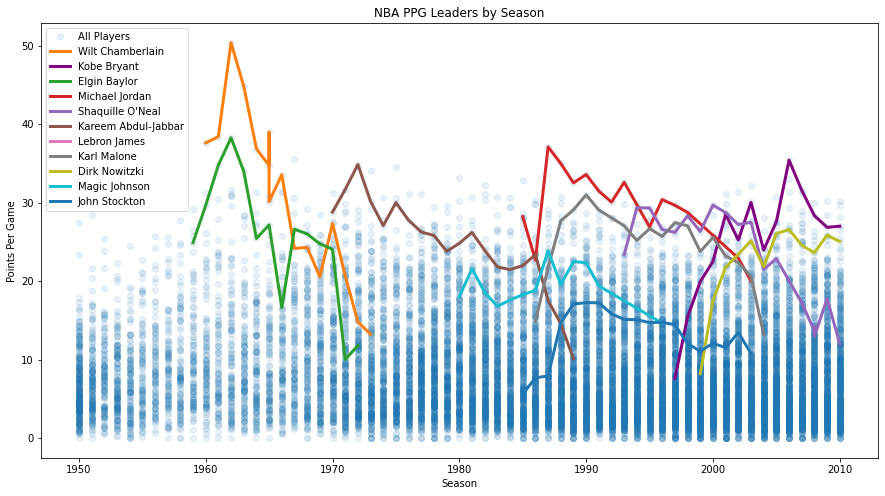

In [0]:
plt.figure(figsize = [15,8])
plt.plot(seasonstats.Year, seasonstats.PPG, 'o', alpha=0.1) # plot all players with transparent circles
plt.plot(seasonstats.Year[seasonstats.Player == 'Wilt Chamberlain*'], seasonstats.PPG[seasonstats.Player == 'Wilt Chamberlain*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Kobe Bryant'], seasonstats.PPG[seasonstats.Player == 'Kobe Bryant'], linewidth=3, color='purple')
plt.plot(seasonstats.Year[seasonstats.Player == 'Elgin Baylor*'], seasonstats.PPG[seasonstats.Player == 'Elgin Baylor*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Michael Jordan*'], seasonstats.PPG[seasonstats.Player == 'Michael Jordan*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Shaquille O'Neal*"], seasonstats.PPG[seasonstats.Player == "Shaquille O'Neal*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Kareem Abdul-Jabbar*"], seasonstats.PPG[seasonstats.Player == "Kareem Abdul-Jabbar*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Lebron James"], seasonstats.PPG[seasonstats.Player == "Lebron James"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Karl Malone*"], seasonstats.PPG[seasonstats.Player == "Karl Malone*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Dirk Nowitzki"], seasonstats.PPG[seasonstats.Player == "Dirk Nowitzki"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Magic Johnson*"], seasonstats.PPG[seasonstats.Player == "Magic Johnson*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "John Stockton*"], seasonstats.PPG[seasonstats.Player == "John Stockton*"], linewidth=3)
plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.title('NBA PPG Leaders by Season')
plt.legend(['All Players', 'Wilt Chamberlain', 'Kobe Bryant', 'Elgin Baylor', 'Michael Jordan', "Shaquille O'Neal", 'Kareem Abdul-Jabbar', 'Lebron James', 'Karl Malone', 'Dirk Nowitzki', 'Magic Johnson', 'John Stockton'])

In [0]:
seasonstats.groupby('Player').PTS.sum().sort_values(ascending=False).head(20)

Player
Kareem Abdul-Jabbar*    38387.0
Karl Malone*            36928.0
Wilt Chamberlain*       33953.0
Michael Jordan*         32292.0
Eddie Johnson           31852.0
Shaquille O'Neal*       29087.0
Dominique Wilkins*      28591.0
Moses Malone*           28492.0
Allen Iverson*          27457.0
Elvin Hayes*            27313.0
Hakeem Olajuwon*        26946.0
Alex English*           26931.0
Oscar Robertson*        26710.0
John Havlicek*          26395.0
Adrian Dantley*         26274.0
Kobe Bryant             25790.0
Reggie Miller*          25279.0
Walt Bellamy*           25205.0
Jerry West*             25192.0
Patrick Ewing*          24815.0
Name: PTS, dtype: float64

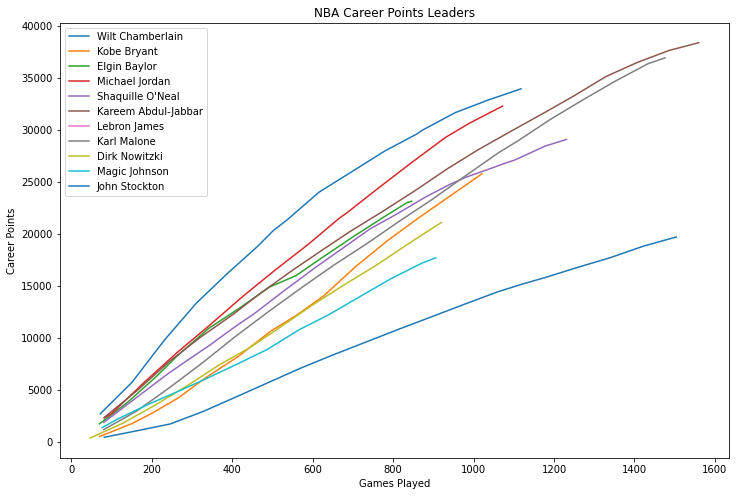

In [0]:
plt.figure(figsize = [12,8])
plt.plot(seasonstats.G[seasonstats.Player == 'Wilt Chamberlain*'].cumsum(), seasonstats.PTS[seasonstats.Player == 'Wilt Chamberlain*'].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == 'Kobe Bryant'].cumsum(), seasonstats.PTS[seasonstats.Player == 'Kobe Bryant'].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == 'Elgin Baylor*'].cumsum(), seasonstats.PTS[seasonstats.Player == 'Elgin Baylor*'].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == 'Michael Jordan*'].cumsum(), seasonstats.PTS[seasonstats.Player == 'Michael Jordan*'].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Shaquille O'Neal*"].cumsum(), seasonstats.PTS[seasonstats.Player == "Shaquille O'Neal*"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Kareem Abdul-Jabbar*"].cumsum(), seasonstats.PTS[seasonstats.Player == "Kareem Abdul-Jabbar*"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Lebron James"].cumsum(), seasonstats.PTS[seasonstats.Player == "Lebron James"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Karl Malone*"].cumsum(), seasonstats.PTS[seasonstats.Player == "Karl Malone*"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Dirk Nowitzki"].cumsum(), seasonstats.PTS[seasonstats.Player == "Dirk Nowitzki"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "Magic Johnson*"].cumsum(), seasonstats.PTS[seasonstats.Player == "Magic Johnson*"].cumsum())
plt.plot(seasonstats.G[seasonstats.Player == "John Stockton*"].cumsum(), seasonstats.PTS[seasonstats.Player == "John Stockton*"].cumsum())
plt.xlabel('Games Played')
plt.ylabel('Career Points')
plt.title('NBA Career Points Leaders')
plt.legend(['Wilt Chamberlain', 'Kobe Bryant', 'Elgin Baylor', 'Michael Jordan', "Shaquille O'Neal", 'Kareem Abdul-Jabbar', 'Lebron James', 'Karl Malone', 'Dirk Nowitzki', 'Magic Johnson', 'John Stockton'])

In [0]:
# Player Efficiency Rating (PER) is highest for players who played < 10 games in a year (and played well in those games)
seasonstats[seasonstats.G > 10].sort_values('PER', ascending=False).head(20)

,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,APG,FGPG,RPG,2PPG,3PPG
12311,1996.0,Darrell Armstrong,PG,27.0,13.0,0.0,41.0,32.4,0.622,0.375,0.125,0.0,5.6,2.8,29.3,7.7,0.0,15.1,43.8,0.0,0.1,0.1,0.158,8.0,-1.4,6.6,0.1,16.0,32.0,0.500,6.0,12.0,0.500,10.0,20.0,0.500,0.594,4.0,4.0,1.000,0.0,2.0,2.0,5.0,6.0,0.0,6.0,4.0,42.0,3.230769,0.384615,1.230769,0.153846,0.769231,0.461538
1827,1963.0,Wilt Chamberlain*,C,26.0,80.0,NaN,3806.0,31.8,0.550,NaN,0.402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,20.9,0.264,NaN,NaN,NaN,NaN,1463.0,2770.0,0.528,NaN,NaN,NaN,1463.0,2770.0,0.528,0.528,660.0,1113.0,0.593,NaN,NaN,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0,44.825000,3.437500,18.287500,24.325000,18.287500,NaN
19611,2009.0,LeBron James,SF,24.0,81.0,81.0,3054.0,31.7,0.591,0.238,0.472,4.3,19.0,11.9,38.0,2.4,2.4,11.0,33.8,13.7,6.5,20.3,0.318,9.4,3.6,13.0,11.6,789.0,1613.0,0.489,132.0,384.0,0.344,657.0,1229.0,0.535,0.530,594.0,762.0,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,28.444444,7.246914,9.740741,7.567901,8.111111,1.629630
8869,1988.0,Michael Jordan*,SG,24.0,82.0,82.0,3311.0,31.7,0.603,0.027,0.430,4.8,10.7,7.8,27.0,3.9,2.4,9.6,34.1,15.2,6.1,21.2,0.308,9.8,2.3,12.2,11.8,1069.0,1998.0,0.535,7.0,53.0,0.132,1062.0,1945.0,0.546,0.537,723.0,860.0,0.841,139.0,310.0,449.0,485.0,259.0,131.0,252.0,270.0,2868.0,34.975610,5.914634,13.036585,5.475610,12.951220,0.085366
1706,1962.0,Wilt Chamberlain*,C,25.0,80.0,NaN,3882.0,31.7,0.536,NaN,0.431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1,6.0,23.1,0.286,NaN,NaN,NaN,NaN,1597.0,3159.0,0.506,NaN,NaN,NaN,1597.0,3159.0,0.506,0.506,835.0,1363.0,0.613,NaN,NaN,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0,50.362500,2.400000,19.962500,25.650000,19.962500,NaN
1962,1964.0,Wilt Chamberlain*,C,27.0,80.0,NaN,3689.0,31.6,0.537,NaN,0.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4,10.6,25.0,0.325,NaN,NaN,NaN,NaN,1204.0,2298.0,0.524,NaN,NaN,NaN,1204.0,2298.0,0.524,0.524,540.0,1016.0,0.531,NaN,NaN,1787.0,403.0,NaN,NaN,NaN,182.0,2948.0,36.850000,5.037500,15.050000,22.337500,15.050000,NaN
10212,1991.0,Michael Jordan*,SG,27.0,82.0,82.0,3034.0,31.6,0.605,0.051,0.365,4.6,14.3,9.5,25.2,3.7,1.7,8.7,32.9,14.9,5.4,20.3,0.321,8.9,1.8,10.8,9.8,990.0,1837.0,0.539,29.0,93.0,0.312,961.0,1744.0,0.551,0.547,571.0,671.0,0.851,118.0,374.0,492.0,453.0,223.0,83.0,202.0,229.0,2580.0,31.463415,5.524390,12.073171,6.000000,11.719512,0.353659
9747,1990.0,Michael Jordan*,SG,26.0,82.0,82.0,3197.0,31.2,0.606,0.125,0.356,5.3,15.6,10.4,28.6,3.5,1.1,9.8,33.7,14.7,4.3,19.0,0.285,9.7,0.8,10.6,10.1,1034.0,1964.0,0.526,92.0,245.0,0.376,942.0,1719.0,0.548,0.550,593.0,699.0,0.848,143.0,422.0,565.0,519.0,227.0,54.0,247.0,241.0,2753.0,33.573171,6.329268,12.609756,6.890244,11.487805,1.121951
9297,1989.0,Michael Jordan*,SG,25.0,81.0,81.0,3255.0,31.1,0.614,0.055,0.442,5.5,17.3,11.6,34.7,3.6,1.2,11.9,32.1,14.6,5.2,19.8,0.292,9.8,2.7,12.6,12.0,966.0,1795.0,0.538,27.0,98.0,0.276,939.0,1697.0,0.553,0.546,674.0,793.0,0.850,149.0,503.0,652.0,650.0,234.0,65.0,290.0,247.0,2633.0,32.506173,8.024691,11.925926,8.049383,11.592593,0.333333
20207,2010.0,LeBron James,SF,25.0,76.0,76.0,2966.0,31.1,0.604,0.253,0.506,3.0,18.5,11.1,41.8,2.2,2.0,12.3,33.5,13.3,5.2,18.5,0.299,9.7,2.8,12.5,10.9,768.0,1528.0,0.503,129.0,387.0,0.333,639.0,1141.0,0.560,0.545,593.0,773.0,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,29.710526,8.565789,10.105263,7.289474,8.407895,1.697368


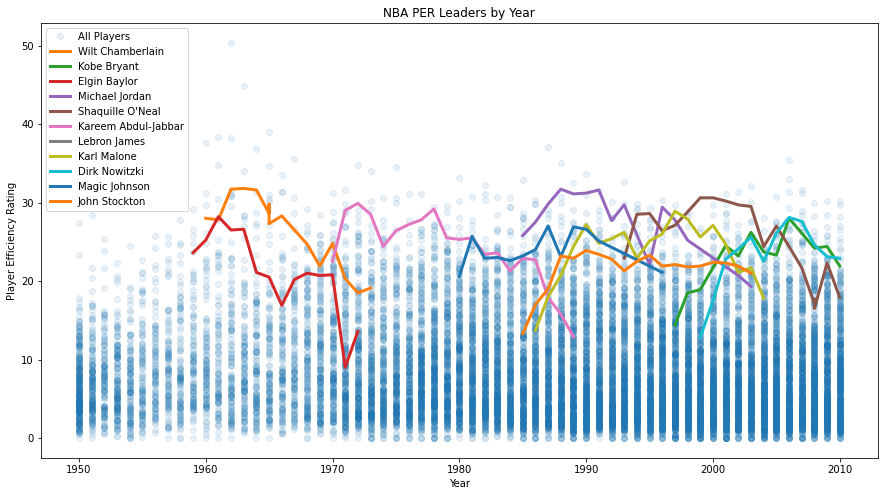

In [0]:
plt.figure(figsize = [15,8])
plt.plot(seasonstats.Year, seasonstats.PPG, 'o', alpha=0.1)
plt.plot(seasonstats.Year[seasonstats.Player == 'Wilt Chamberlain*'], seasonstats.PER[seasonstats.Player == 'Wilt Chamberlain*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Kobe Bryant'], seasonstats.PER[seasonstats.Player == 'Kobe Bryant'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Elgin Baylor*'], seasonstats.PER[seasonstats.Player == 'Elgin Baylor*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Michael Jordan*'], seasonstats.PER[seasonstats.Player == 'Michael Jordan*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Shaquille O'Neal*"], seasonstats.PER[seasonstats.Player == "Shaquille O'Neal*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Kareem Abdul-Jabbar*"], seasonstats.PER[seasonstats.Player == "Kareem Abdul-Jabbar*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Lebron James"], seasonstats.PER[seasonstats.Player == "Lebron James"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Karl Malone*"], seasonstats.PER[seasonstats.Player == "Karl Malone*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Dirk Nowitzki"], seasonstats.PER[seasonstats.Player == "Dirk Nowitzki"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Magic Johnson*"], seasonstats.PER[seasonstats.Player == "Magic Johnson*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "John Stockton*"], seasonstats.PER[seasonstats.Player == "John Stockton*"], linewidth=3)
plt.xlabel('Year')
plt.ylabel('Player Efficiency Rating')
plt.title('NBA PER Leaders by Year')
plt.legend(['All Players', 'Wilt Chamberlain', 'Kobe Bryant', 'Elgin Baylor', 'Michael Jordan', "Shaquille O'Neal", 'Kareem Abdul-Jabbar', 'Lebron James', 'Karl Malone', 'Dirk Nowitzki', 'Magic Johnson', 'John Stockton'])

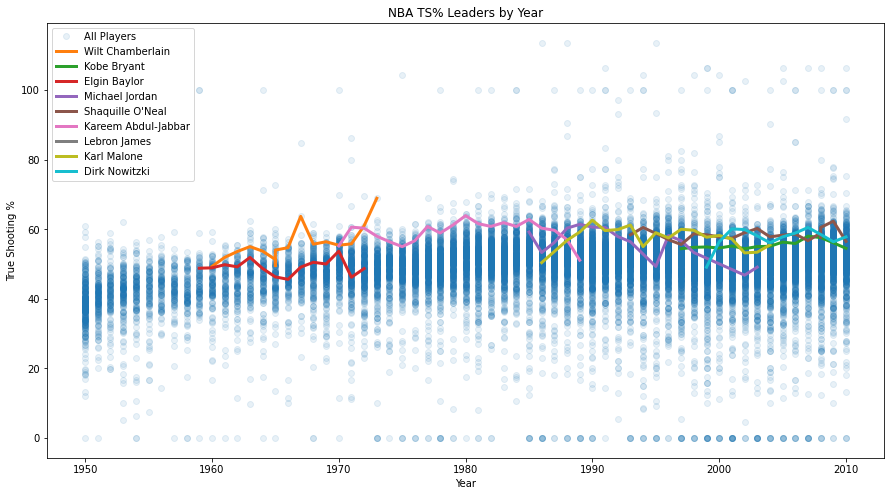

In [0]:
plt.figure(figsize = [15,8]) # TS% = True Shooting % measures a player's efficiency at shooting the ball
plt.plot(seasonstats.Year, seasonstats['TS%'] * 100, 'o', alpha=0.1)
plt.plot(seasonstats.Year[seasonstats.Player == 'Wilt Chamberlain*'], seasonstats['TS%'][seasonstats.Player == 'Wilt Chamberlain*'] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Kobe Bryant'], seasonstats['TS%'][seasonstats.Player == 'Kobe Bryant'] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Elgin Baylor*'], seasonstats['TS%'][seasonstats.Player == 'Elgin Baylor*'] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Michael Jordan*'], seasonstats['TS%'][seasonstats.Player == 'Michael Jordan*'] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Shaquille O'Neal*"], seasonstats['TS%'][seasonstats.Player == "Shaquille O'Neal*"] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Kareem Abdul-Jabbar*"], seasonstats['TS%'][seasonstats.Player == "Kareem Abdul-Jabbar*"] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Lebron James"], seasonstats['TS%'][seasonstats.Player == "Lebron James"] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Karl Malone*"], seasonstats['TS%'][seasonstats.Player == "Karl Malone*"] * 100, linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Dirk Nowitzki"], seasonstats['TS%'][seasonstats.Player == "Dirk Nowitzki"] * 100, linewidth=3)
plt.xlabel('Year')
plt.ylabel('True Shooting %')
plt.title('NBA TS% Leaders by Year')
plt.legend(['All Players', 'Wilt Chamberlain', 'Kobe Bryant', 'Elgin Baylor', 'Michael Jordan', "Shaquille O'Neal", 'Kareem Abdul-Jabbar', 'Lebron James', 'Karl Malone', 'Dirk Nowitzki'])

In [0]:
# Best single season Assists Per Game
seasonstats[['Player', 'Year', 'APG']].sort_values('APG', ascending=False).head(20)

,Player,Year,APG
9923,John Stockton*,1990.0,14.538462
10377,John Stockton*,1991.0,14.195122
7857,Isiah Thomas*,1985.0,13.864198
9018,John Stockton*,1988.0,13.756098
10844,John Stockton*,1992.0,13.731707
9461,John Stockton*,1989.0,13.634146
5621,Kevin Porter,1979.0,13.402439
7348,Magic Johnson*,1984.0,13.059701
9283,Magic Johnson*,1989.0,12.831169
8082,Magic Johnson*,1986.0,12.597222


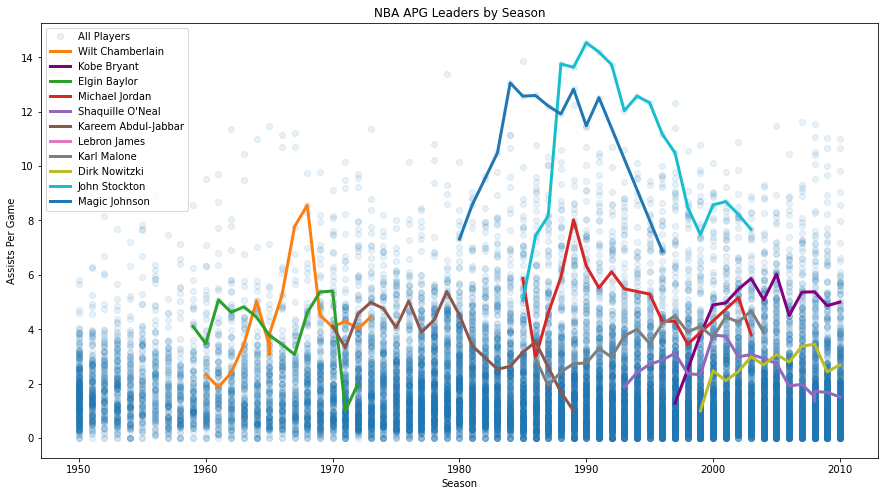

In [0]:
plt.figure(figsize = [15,8])
plt.plot(seasonstats.Year, seasonstats.APG, 'o', alpha=0.1)
plt.plot(seasonstats.Year[seasonstats.Player == 'Wilt Chamberlain*'], seasonstats.APG[seasonstats.Player == 'Wilt Chamberlain*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Kobe Bryant'], seasonstats.APG[seasonstats.Player == 'Kobe Bryant'], linewidth=3, color='purple')
plt.plot(seasonstats.Year[seasonstats.Player == 'Elgin Baylor*'], seasonstats.APG[seasonstats.Player == 'Elgin Baylor*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == 'Michael Jordan*'], seasonstats.APG[seasonstats.Player == 'Michael Jordan*'], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Shaquille O'Neal*"], seasonstats.APG[seasonstats.Player == "Shaquille O'Neal*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Kareem Abdul-Jabbar*"], seasonstats.APG[seasonstats.Player == "Kareem Abdul-Jabbar*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Lebron James"], seasonstats.APG[seasonstats.Player == "Lebron James"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Karl Malone*"], seasonstats.APG[seasonstats.Player == "Karl Malone*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Dirk Nowitzki"], seasonstats.APG[seasonstats.Player == "Dirk Nowitzki"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "John Stockton*"], seasonstats.APG[seasonstats.Player == "John Stockton*"], linewidth=3)
plt.plot(seasonstats.Year[seasonstats.Player == "Magic Johnson*"], seasonstats.APG[seasonstats.Player == "Magic Johnson*"], linewidth=3)
plt.xlabel('Season')
plt.ylabel('Assists Per Game')
plt.title('NBA APG Leaders by Season')
plt.legend(['All Players', 'Wilt Chamberlain', 'Kobe Bryant', 'Elgin Baylor', 'Michael Jordan', "Shaquille O'Neal", 'Kareem Abdul-Jabbar', 'Lebron James', 'Karl Malone', 'Dirk Nowitzki', 'John Stockton', 'Magic Johnson'])

# the best PPG players are usually a bit more selfish with the ball, and the best passers don't get the most PPG

In [0]:
seasonstats.corr()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,APG,FGPG,RPG,2PPG,3PPG
Year,1.000000,0.112176,-0.081325,-0.036032,-0.097916,-0.024611,0.221743,0.359576,-0.069803,-0.050490,0.063088,0.014249,0.001264,-0.024091,0.104188,-0.112478,-0.038857,-0.020125,-0.067152,-0.042101,0.010336,-0.035582,-0.001663,-0.029478,-0.026629,-0.093743,-0.129801,0.152000,0.254861,0.253631,0.210694,-0.154219,-0.214249,0.223728,0.269798,-0.149644,-0.164560,0.034442,-0.155064,-0.075972,-0.167605,-0.065283,-0.141457,-0.056988,-0.185908,-0.176456,-0.085496,-0.077570,-0.058731,-0.086539,-0.168992,-0.166618,0.303440
Age,0.112176,1.000000,0.027558,0.040906,0.062142,0.014590,0.065158,0.080024,-0.053216,-0.085658,0.022220,-0.024590,0.043668,-0.055158,-0.032482,-0.030190,-0.152866,0.073994,0.079611,0.085146,0.095920,0.046824,0.077611,0.074419,0.041112,0.021845,0.022351,0.025067,0.062510,0.055019,0.079638,0.009256,0.007275,0.029646,0.056858,0.016506,0.001164,0.118874,-0.026323,0.039365,0.023921,0.065198,-0.007923,-0.011121,-0.030566,0.014660,0.025564,0.046184,0.092179,0.041307,0.044325,0.022397,0.084412
G,-0.081325,0.027558,1.000000,0.640351,0.849678,0.423617,0.369641,-0.009457,-0.053956,-0.043137,0.054121,0.014465,0.141425,0.032817,0.023662,-0.165151,0.037040,0.499930,0.667251,0.627499,0.415880,0.500064,0.326892,0.557442,0.433955,0.727505,0.738207,0.346491,0.361651,0.382741,0.034766,0.709070,0.717300,0.327627,0.343060,0.640057,0.653268,0.213410,0.642982,0.686351,0.662009,0.589971,0.707352,0.453222,0.752962,0.862572,0.723207,0.545641,0.401901,0.553551,0.455138,0.538848,0.225391
GS,-0.036032,0.040906,0.640351,1.000000,0.881039,0.437745,0.296825,-0.036038,-0.014976,-0.038636,0.106905,0.050441,0.210551,0.020636,0.042284,-0.145779,0.190968,0.686003,0.737532,0.775520,0.342795,0.465089,0.272784,0.506488,0.674019,0.830716,0.827074,0.268465,0.387578,0.407005,0.051830,0.811481,0.813706,0.256833,0.269415,0.751426,0.759098,0.175833,0.651379,0.764471,0.746582,0.657089,0.737027,0.498116,0.815691,0.744926,0.827210,0.753320,0.551817,0.759089,0.638171,0.737060,0.293733
MP,-0.097916,0.062142,0.849678,0.881039,1.000000,0.519956,0.367022,0.016162,-0.023632,-0.079441,0.064840,0.004164,0.236252,0.049329,0.002823,-0.192260,0.201473,0.724227,0.796264,0.836976,0.435255,0.575299,0.302220,0.606264,0.687469,0.924453,0.930572,0.324808,0.475979,0.501112,0.085595,0.898805,0.901549,0.310888,0.326512,0.843567,0.849553,0.255997,0.714972,0.816715,0.788773,0.748379,0.841432,0.513492,0.909895,0.878630,0.926383,0.818578,0.608411,0.818735,0.640414,0.791972,0.357144
PER,-0.024611,0.014590,0.423617,0.437745,0.519956,1.000000,0.712275,-0.032121,0.144496,0.153955,0.179040,0.192953,0.263858,0.196891,0.096281,-0.381790,0.292601,0.579724,0.468353,0.599343,0.880476,0.883765,0.193890,0.802934,0.517676,0.571221,0.551684,0.643850,0.240633,0.249869,0.139934,0.560076,0.539380,0.613909,0.644079,0.569249,0.569626,0.316032,0.421774,0.468164,0.467331,0.415390,0.465962,0.328151,0.507818,0.431695,0.581731,0.641015,0.402857,0.629164,0.470088,0.612465,0.225794
TS%,0.221743,0.065158,0.369641,0.296825,0.367022,0.712275,1.000000,0.012574,0.193251,0.015005,0.103399,0.073399,0.076707,-0.001689,0.024733,-0.114268,0.027119,0.422117,0.288574,0.415558,0.755971,0.717856,0.136805,0.639931,0.320041,0.356212,0.310936,0.908018,0.197951,0.187366,0.214505,0.333087,0.282140,0.883745,0.941040,0.338321,0.331471,0.338729,0.297365,0.325034,0.284257,0.248940,0.286672,0.219447,0.339015,0.333859,0.365081,0.395111,0.213065,0.384987,0.255806,0.352785,0.192786
3PAr,0.359576,0.080024,-0.009457,-0.036038,0.016162,-0.032121,0.012574,1.000000,-0.267704,-0.458303,-0.335354,-0.439083,0.272745,0.116681,-0.288495,-0.122763,0.041855,0.050828,-0.081668,0.001421,-0.008984,0.204439,-0.220631,0.060614,0.043489,-0.034816,0.017084,-0.263832,0.618635,0.619884,0.438950,-0.162578,-0.148534,-0.111661,0.036130,-0.075725,-

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


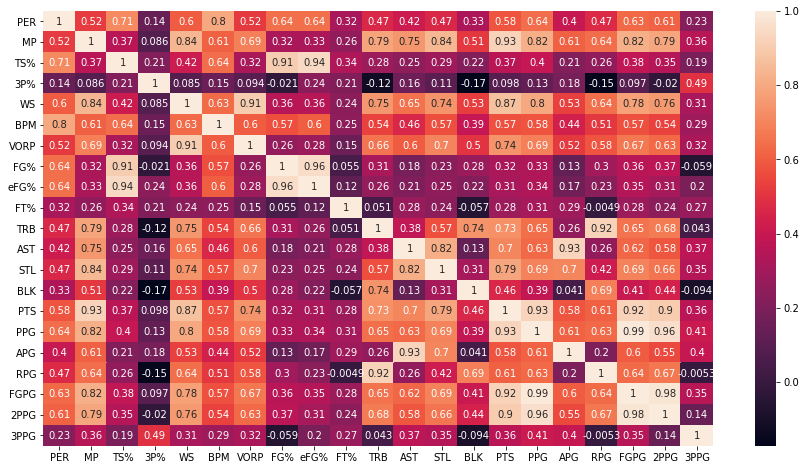

In [0]:
import seaborn
plt.figure(figsize=[15, 8])
seaborn.heatmap(seasonstats[['PER', 'MP', 'TS%', '3P%', 'WS', 'BPM', 'VORP', 'FG%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'PPG', 'APG', 'RPG', 'FGPG', '2PPG', '3PPG']].corr(), annot=True)
# 3 Point % has a low correlation with most other stats, not a big contributor to overall player skill

#PART 3: KERAS DATA PREPROCESSING

In [0]:
#columns = seasonstats[['PER', 'MP', 'TS%', '3P%', 'WS', 'BPM', 'VORP', 'FG%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PPG']]
columns = seasonstats.drop(columns=['Player', 'Pos']) # drop the only 2 string dtype columns
columns.isna().sum() # there are a lot of null values in the data

Year       60
Age        68
G          60
GS       6451
MP        546
PER       582
TS%       125
3PAr     5824
FTr       138
ORB%     3891
DRB%     3891
TRB%     3112
AST%     2128
STL%     3891
BLK%     3891
TOV%     5085
USG%     5043
OWS        99
DWS        99
WS         99
WS/48     582
OBPM     3887
DBPM     3887
BPM      3887
VORP     3887
FG         60
FGA        60
FG%       138
3P       5757
3PA      5757
3P%      8682
2P         60
2PA        60
2P%       154
eFG%      138
FT         60
FTA        60
FT%       737
ORB      3887
DRB      3887
TRB       372
AST        60
STL      3888
BLK      3888
TOV      5040
PF         61
PTS        61
PPG        61
APG        60
FGPG       60
RPG       372
2PPG       60
3PPG     5757
dtype: int64

In [0]:
#columns.dropna(inplace=True) # drop all null values
columns.fillna(0, inplace=True) # make all null values 0

In [0]:
columns.isna().sum() # no null values

Year     0
Age      0
G        0
GS       0
MP       0
PER      0
TS%      0
3PAr     0
FTr      0
ORB%     0
DRB%     0
TRB%     0
AST%     0
STL%     0
BLK%     0
TOV%     0
USG%     0
OWS      0
DWS      0
WS       0
WS/48    0
OBPM     0
DBPM     0
BPM      0
VORP     0
FG       0
FGA      0
FG%      0
3P       0
3PA      0
3P%      0
2P       0
2PA      0
2P%      0
eFG%     0
FT       0
FTA      0
FT%      0
ORB      0
DRB      0
TRB      0
AST      0
STL      0
BLK      0
TOV      0
PF       0
PTS      0
PPG      0
APG      0
FGPG     0
RPG      0
2PPG     0
3PPG     0
dtype: int64

In [0]:
features = columns.drop(columns=['PPG', 'PTS']) # trying to predict season PPG with every other stat except PTS (too easy since PPG = PTS / G)
labels = columns['PPG'] 

In [0]:
features = np.array(features) # convert to numpy array to input into keras model
labels = np.array(labels)
#features = (features - features.mean(axis=0)) / features.std(axis=0) # standard score normalization

In [0]:
features

array([[1.95000000e+03, 3.10000000e+01, 6.30000000e+01, ...,
        0.00000000e+00, 2.28571429e+00, 0.00000000e+00],
       [1.95000000e+03, 2.90000000e+01, 4.90000000e+01, ...,
        0.00000000e+00, 2.08163265e+00, 0.00000000e+00],
       [1.95000000e+03, 2.50000000e+01, 6.70000000e+01, ...,
        0.00000000e+00, 2.59701493e+00, 0.00000000e+00],
       ...,
       [2.01000000e+03, 2.20000000e+01, 8.00000000e+00, ...,
        6.25000000e-01, 3.75000000e-01, 0.00000000e+00],
       [2.01000000e+03, 2.20000000e+01, 2.70000000e+01, ...,
        3.07407407e+00, 2.48148148e+00, 1.85185185e+00],
       [2.01000000e+03, 3.50000000e+01, 6.90000000e+01, ...,
        8.65217391e+00, 2.28985507e+00, 0.00000000e+00]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scaling the data using standard score normalization z = (x - mean(x)) / std(x)
scaler.fit(features)
scaler.mean_ # mean value for every column

array([ 1.98234233e+03,  2.65936080e+01,  5.15181058e+01,  1.65554415e+01,
        1.20696066e+03,  1.21118800e+01,  4.86309925e-01,  9.22865171e-02,
        3.31987001e-01,  5.18795875e+00,  1.09383668e+01,  8.44570200e+00,
        1.16834286e+01,  1.34805747e+00,  1.10355764e+00,  1.15722279e+01,
        1.43209842e+01,  1.27775009e+00,  1.25442506e+00,  2.53327469e+00,
        6.21952793e-02, -1.47378195e+00, -4.66588477e-01, -1.94004789e+00,
        4.65694180e-01,  2.01020232e+02,  4.42867664e+02,  4.27253286e-01,
        1.34934272e+01,  3.89398915e+01,  1.36320627e-01,  1.87526804e+02,
        4.03927772e+02,  4.37770855e-01,  4.42150027e-01,  1.07396863e+02,
        1.43719201e+02,  6.92516151e-01,  5.34967502e+01,  1.20856033e+02,
        2.28437179e+02,  1.18146215e+02,  3.35752822e+01,  2.04968968e+01,
        5.84415286e+01,  1.21583199e+02,  1.91373374e+00,  3.21979974e+00,
        3.73371188e+00,  2.99654563e+00,  2.23254116e-01])

In [0]:
features = scaler.transform(features) # transform function brings our features into a normal distribution
features

array([[-0.29764577,  1.08400375,  0.42998629, ..., -1.26214758,
        -0.3103168 , -0.49037913],
       [-0.29764577,  0.59198954, -0.09430073, ..., -1.26214758,
        -0.3994096 , -0.49037913],
       [-0.29764577, -0.39203889,  0.57978258, ..., -1.26214758,
        -0.17441702, -0.49037913],
       ...,
       [ 0.25453302, -1.13006021, -1.6297127 , ..., -1.05087197,
        -1.14444819, -0.49037913],
       [ 0.25453302, -1.13006021, -0.91818032, ..., -0.2229846 ,
        -0.2248537 ,  3.57722564],
       [ 0.25453302,  2.06803218,  0.65468072, ...,  1.66264167,
        -0.30850912, -0.49037913]])

In [0]:
labels.reshape(labels.shape[0], 1) # don't scale labels because this is a regression model but reshape so that we can use it as keras model input

array([[ 7.26984127],
       [ 5.69387755],
       [ 6.53731343],
       ...,
       [ 1.        ],
       [11.88888889],
       [ 0.        ]])

In [0]:
from sklearn.model_selection import train_test_split

# split into 80% training data, 20% testing data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [0]:
x_train.shape

(16370, 51)

In [0]:
x_test.shape

(4093, 51)

In [0]:
y_train.shape

(16370,)

#PART 4: KERAS MODELING AND PREDICTIONS

In [0]:
from tensorflow.keras import models, layers

model = models.Sequential()
# 5 Dense layers with exponentially decreasing number of hidden units
model.add(layers.Dense(256, input_shape=(51,))) # each input tensor has 51 features
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1)) # 1 hidden unit since we are trying to predict 1 value for PPG
# no activation (filter) function in the last layer since this is a regression model

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse']) # accuracy doesn't help since this is regression 
# accuracy was ~6% but mse is almost 0

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               13312     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 56,577
Trainable params: 56,577
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.1, verbose=1)

Epoch 1/50
148/148 [==============================] - 1s 4ms/step - loss: 11.1172 - mse: 11.1662 - val_loss: 0.5840 - val_mse: 0.5870
Epoch 2/50
148/148 [==============================] - 0s 3ms/step - loss: 0.3360 - mse: 0.3368 - val_loss: 0.1925 - val_mse: 0.1913
Epoch 3/50
148/148 [==============================] - 0s 3ms/step - loss: 0.1377 - mse: 0.1380 - val_loss: 0.0855 - val_mse: 0.0861
Epoch 4/50
148/148 [==============================] - 0s 3ms/step - loss: 0.0797 - mse: 0.0798 - val_loss: 0.0687 - val_mse: 0.0688
Epoch 5/50
148/148 [==============================] - 0s 3ms/step - loss: 0.0545 - mse: 0.0547 - val_loss: 0.0391 - val_mse: 0.0390
Epoch 6/50
148/148 [==============================] - 0s 3ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0390 - val_mse: 0.0391
Epoch 7/50
148/148 [==============================] - 0s 3ms/step - loss: 0.0384 - mse: 0.0382 - val_loss: 0.0516 - val_mse: 0.0522
Epoch 8/50
148/148 [==============================] - 0s 3ms/step - loss: 

In [0]:
val_mse, val_mae = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print("Mean Squared Error =", val_mse)
# Error of ~1%

Mean Squared Error = 0.01125271525233984


In [0]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

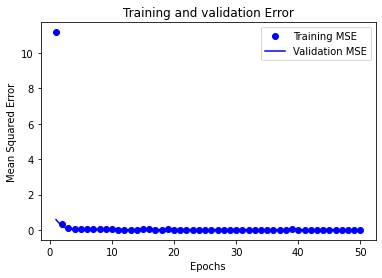

In [0]:
plt.plot(range(1, len(hist_dict['mse']) + 1), hist_dict['mse'], 'bo')
plt.plot(range(1, len(hist_dict['val_mse']) + 1), hist_dict['val_mse'], 'b')
plt.title('Training and validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'])
# Model is good, more epochs doesn't make too much of a difference but after 80 the error is more consistent

K-FOLD CROSS VALIDATION

In [0]:
k = 10 # we have a big dataset, play around with the number to get more granular readings
num_samples = len(x_train) // k
scores = []

for i in range(k):
  print('FOLD NUMBER:', str(i+1))
  val_data = x_train[i * num_samples: (i + 1) * num_samples] # split into num_samples samples for validation
  val_targets = y_train[i * num_samples: (i + 1) * num_samples]

  partial_train_data = np.concatenate([x_train[:i * num_samples], x_train[(i + 1) * num_samples:]],axis=0) 
  partial_train_targets = np.concatenate([y_train[:i * num_samples], y_train[(i + 1) * num_samples:]], axis=0)

  # model is already built and compiled, just need to fit it to the partial data in each fold (using 50 epochs and batch_size=100)
  model.fit(partial_train_data, partial_train_targets, epochs=50, batch_size=100, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  scores.append(val_mse)
  print('FOLD NUMBER', str(i+1), 'MSE =', val_mse) # mean squared error is the main regression error metric for each fold

FOLD NUMBER: 1
FOLD NUMBER 1 MSE = 0.014617832377552986
FOLD NUMBER: 2
FOLD NUMBER 2 MSE = 0.014520222321152687
FOLD NUMBER: 3
FOLD NUMBER 3 MSE = 0.0022369769867509604
FOLD NUMBER: 4
FOLD NUMBER 4 MSE = 0.0030946326442062855
FOLD NUMBER: 5
FOLD NUMBER 5 MSE = 0.008845479227602482
FOLD NUMBER: 6
FOLD NUMBER 6 MSE = 0.004191677551716566
FOLD NUMBER: 7
FOLD NUMBER 7 MSE = 0.002644818276166916
FOLD NUMBER: 8
FOLD NUMBER 8 MSE = 0.001750636612996459
FOLD NUMBER: 9
FOLD NUMBER 9 MSE = 0.0030104080215096474
FOLD NUMBER: 10
FOLD NUMBER 10 MSE = 0.0019144391408190131


In [0]:
y_predict = model.predict(x_test) # predict PPG for test data

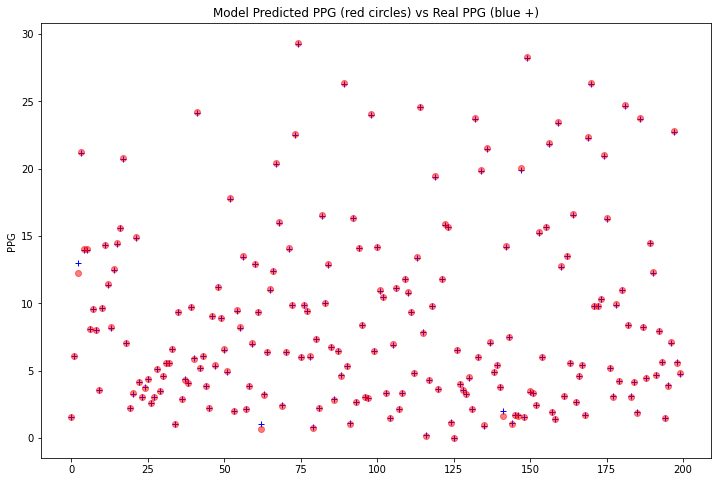

In [0]:
# Plotting Model Predicted PPG vs Actual PPG for first 200 test values
plt.figure(figsize = [12,8])
plt.plot(y_test[:200], '+', color ='blue') # test labels
plt.plot(y_predict[:200], 'ro', alpha=0.5) # model predictions
plt.title('Model Predicted PPG (red circles) vs Real PPG (blue +)')
plt.ylabel('PPG')
plt.show()

In [0]:
# Now we will use the same model to predict Assists Per Game without AST
ast_features = columns.drop(columns=['APG', 'AST'])
ast_labels = columns['APG']
ast_features = np.array(ast_features)
ast_labels = np.array(ast_labels)

In [0]:
ast_features = (ast_features - ast_features.mean(axis=0)) / ast_features.std(axis=0) # standard score normalization
ast_labels.reshape(ast_labels.shape[0], 1)

array([[2.79365079],
       [2.2244898 ],
       [2.08955224],
       ...,
       [0.375     ],
       [1.37037037],
       [1.52173913]])

In [0]:
ast_x_train, ast_x_test, ast_y_train, ast_y_test = train_test_split(ast_features, ast_labels, test_size=0.2, random_state=1)

In [0]:
ast_history = model.fit(ast_x_train, ast_y_train, epochs=50, batch_size=100, validation_split=0.1, verbose=1)

Epoch 1/50
148/148 [==============================] - 0s 3ms/step - loss: 1.8502 - mse: 1.8580 - val_loss: 0.2213 - val_mse: 0.2234
Epoch 2/50
148/148 [==============================] - 0s 2ms/step - loss: 0.2662 - mse: 0.2661 - val_loss: 0.1792 - val_mse: 0.1796
Epoch 3/50
148/148 [==============================] - 0s 3ms/step - loss: 0.2191 - mse: 0.2195 - val_loss: 0.1436 - val_mse: 0.1449
Epoch 4/50
148/148 [==============================] - 0s 2ms/step - loss: 0.1935 - mse: 0.1939 - val_loss: 0.1291 - val_mse: 0.1304
Epoch 5/50
148/148 [==============================] - 0s 3ms/step - loss: 0.1770 - mse: 0.1776 - val_loss: 0.1232 - val_mse: 0.1248
Epoch 6/50
148/148 [==============================] - 0s 3ms/step - loss: 0.1630 - mse: 0.1635 - val_loss: 0.1284 - val_mse: 0.1300
Epoch 7/50
148/148 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.1578 - val_loss: 0.1262 - val_mse: 0.1273
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 0.

In [0]:
# Model has a bit more loss predicting APG at ~5%
ast_predict = model.predict(ast_x_test)

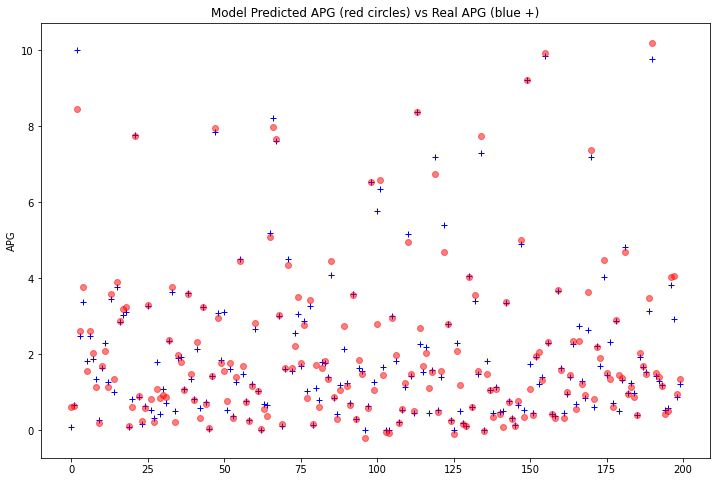

In [0]:
plt.figure(figsize = [12,8])
plt.plot(ast_y_test[:200], '+', color ='blue')
plt.plot(ast_predict[:200], 'ro', alpha=0.5)
plt.title('Model Predicted APG (red circles) vs Real APG (blue +)')
plt.ylabel('APG')
plt.show()